<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Residential-PV-in-the-US" data-toc-modified-id="Residential-PV-in-the-US-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Residential PV in the US</a></span><ul class="toc-item"><li><span><a href="#Wright" data-toc-modified-id="Wright-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Wright</a></span></li><li><span><a href="#Boone" data-toc-modified-id="Boone-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Boone</a></span></li><li><span><a href="#Sigmoid" data-toc-modified-id="Sigmoid-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Sigmoid</a></span></li><li><span><a href="#Plateau" data-toc-modified-id="Plateau-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Plateau</a></span></li><li><span><a href="#S-curve" data-toc-modified-id="S-curve-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>S-curve</a></span></li></ul></li><li><span><a href="#Global-onshore-wind" data-toc-modified-id="Global-onshore-wind-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Global onshore wind</a></span><ul class="toc-item"><li><span><a href="#Wright" data-toc-modified-id="Wright-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Wright</a></span></li><li><span><a href="#Boone" data-toc-modified-id="Boone-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Boone</a></span></li><li><span><a href="#Sigmoid" data-toc-modified-id="Sigmoid-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Sigmoid</a></span></li><li><span><a href="#Plateau" data-toc-modified-id="Plateau-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Plateau</a></span></li><li><span><a href="#S-curve" data-toc-modified-id="S-curve-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>S-curve</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy import stats

In [2]:
def wright(x,a,b):
    return np.exp(a+b*np.log(x))

In [3]:
def boone(x,a,b,c):
    return(a*x**(b/(1+x/c)))

In [4]:
def sigmoid(x,a,b,c,d):
    return a/(b+np.exp(-c*x))+d

In [5]:
def plateau(x,a,b,c):
    return a+c*x**b

In [6]:
def s_curve(x,c,m,a,b):
    return c*(m+(1-m)*(x+a)**b)

# Residential PV in the US

In [7]:
# Data
train_test_ratio = 0.55
cost = np.array([9676,9764,9334,8944,7630,6787,5697,4915,4639,4563,4305,4069,3818,3710,3707])
cap = np.array([0.1,0.2,0.3,0.4,0.8,1.0,1.5,2.3,3.5,5.7,8.4,10.6,12.7,15.5,18.3])
N = len(cost)

# Training set (from 2006 to 2013)

cost_train = cost[0:int(N*train_test_ratio)]
cap_train = cap[0:int(N*train_test_ratio)]

# Testing set (from 2014 to 2020)

cost_test = cost[int(N*train_test_ratio):N]
cap_test = cap[int(N*train_test_ratio):N]

# Uncertainty on cost
percentile_20 = np.array([8700,8825,8424,7849,6520,5774,4713,4043,3805,3790,3610,3295,3119,2995,2910])
percentile_80 = np.array([10664,10770,10345,10126,9119,8350,7332,6030,5495,5410,5315,5090,4737,4446,4483])

In [8]:
# Results 
MSE_wright = []
MSE_boone = []
MSE_sigmoid = []
MSE_plateau = []
MSE_s_curve = []

## Wright

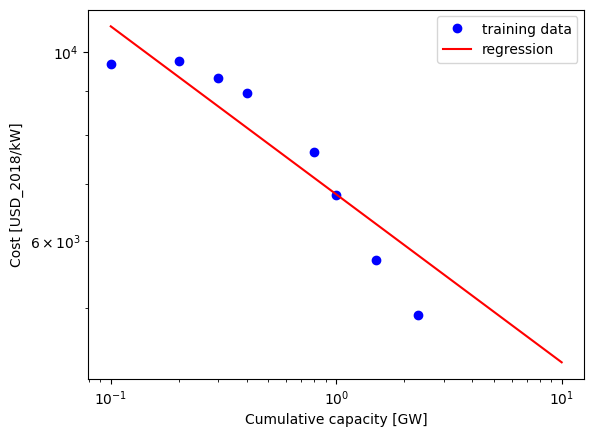

Training : R^2 = 0.8509729219725439


In [9]:
a = 8.82571

b = -0.197338

reg = wright(x=cap_train,a=a,b=b) # for R^2 computation
x_reg = np.logspace(-1,1,50)
y_reg = wright(x=x_reg,a=a,b=b) # for plotting

plt.plot(cap_train, cost_train,'bo',label='training data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(cost_train,reg)

r2 = r_value**2 
print("Training : R^2 = " + str(r_value**2))

MSE_wright.append(int(((reg-cost_train)**2).sum()/int(N*train_test_ratio)))

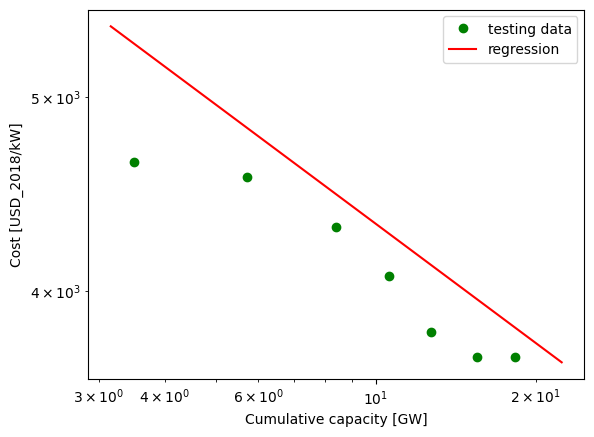

Testing : R^2 = 0.9178611338619478


In [10]:
reg = wright(x=cap_test,a=a,b=b) # for R^2 computation
x_reg = np.logspace(0.5,1.35,50)
y_reg = wright(x=x_reg,a=a,b=b) # for plotting

plt.plot(cap_test, cost_test,'go',label='testing data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(cost_test,reg)

r2 = r_value**2 
print("Testing : R^2 = " + str(r_value**2))

MSE_wright.append(int(((reg-cost_test)**2).sum()/(N-int(N*train_test_ratio))))

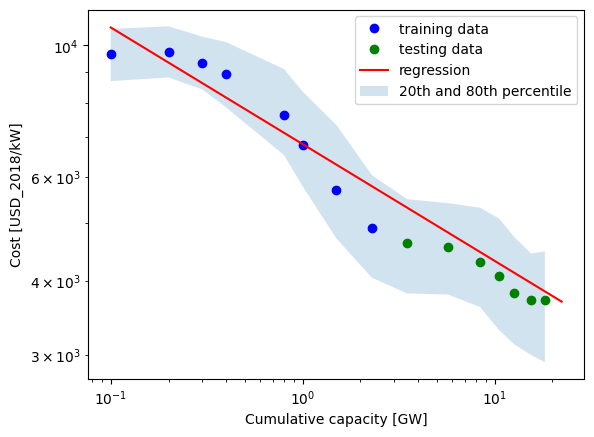

In [11]:
reg = wright(x=cap_test,a=a,b=b) # for R^2 computation
x_reg = np.logspace(-1,1.35,50)
y_reg = wright(x=x_reg,a=a,b=b) # for plotting

plt.plot(cap_train, cost_train,'bo',label='training data')
plt.plot(cap_test, cost_test,'go',label='testing data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.fill_between(cap,percentile_20,percentile_80,alpha=0.2,label='20th and 80th percentile')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

## Boone

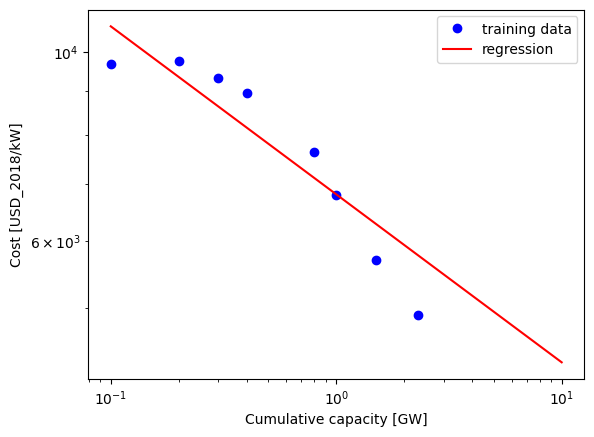

Training : R^2 = 0.8509729089563359


In [12]:
a = 6807.01

b = -0.197338

c = 17690700

reg = boone(x=cap_train,a=a,b=b,c=c) # for R^2 computation
x_reg = np.logspace(-1,1,50)
y_reg = boone(x=x_reg,a=a,b=b,c=c) # for plotting

plt.plot(cap_train, cost_train,'bo',label='training data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(cost_train,reg)

r2 = r_value**2 
print("Training : R^2 = " + str(r_value**2))

MSE_boone.append(int(((reg-cost_train)**2).sum()/int(N*train_test_ratio)))

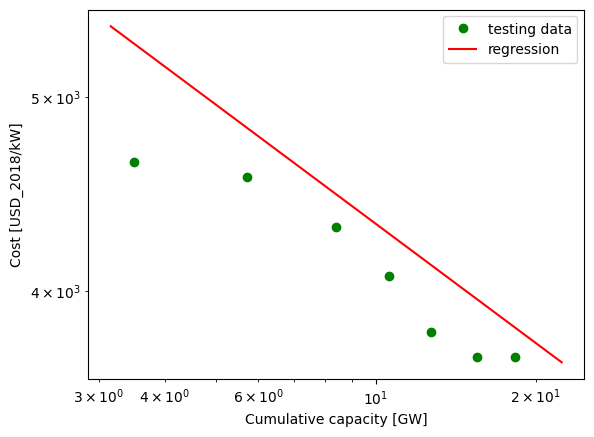

Testing : R^2 = 0.917860994555955


In [13]:
reg = boone(x=cap_test,a=a,b=b,c=c) # for R^2 computation
x_reg = np.logspace(0.5,1.35,50)
y_reg = boone(x=x_reg,a=a,b=b,c=c) # for plotting

plt.plot(cap_test, cost_test,'go',label='testing data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(cost_test,reg)

r2 = r_value**2 
print("Testing : R^2 = " + str(r_value**2))

MSE_boone.append(int(((reg-cost_test)**2).sum()/(N-int(N*train_test_ratio))))

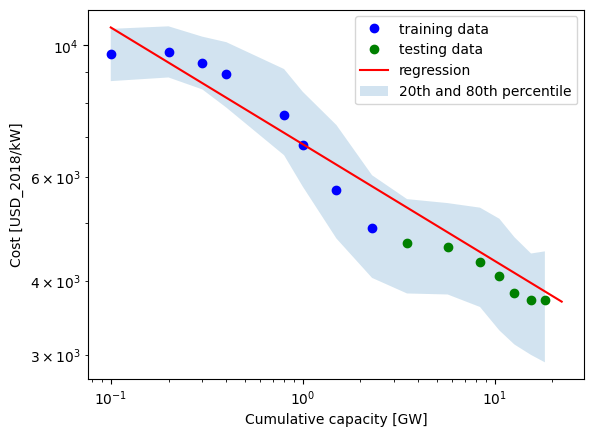

In [14]:
reg = boone(x=cap_test,a=a,b=b,c=c) # for R^2 computation
x_reg = np.logspace(-1,1.35,50)
y_reg = boone(x=x_reg,a=a,b=b,c=c) # for plotting

plt.plot(cap_train, cost_train,'bo',label='training data')
plt.plot(cap_test, cost_test,'go',label='testing data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.fill_between(cap,percentile_20,percentile_80,alpha=0.2,label='20th and 80th percentile')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.savefig("train_test_LC.pdf", format="pdf")
plt.show()

## Sigmoid

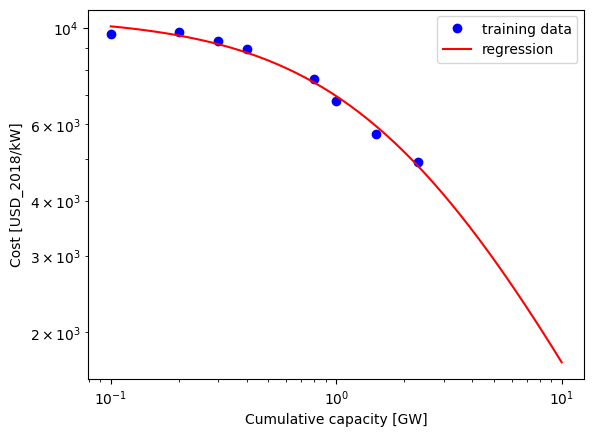

Training : R^2 = 0.9850853066794372


In [15]:
a = 1.86432

b = -0.999824

c = -9.16866e-05

d = 1.59962

reg = sigmoid(x=cap_train,a=a,b=b,c=c,d=d) # for R^2 computation
x_reg = np.logspace(-1,1,50)
y_reg = sigmoid(x=x_reg,a=a,b=b,c=c,d=d) # for plotting

plt.plot(cap_train, cost_train,'bo',label='training data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(cost_train,reg)

r2 = r_value**2 
print("Training : R^2 = " + str(r_value**2))

MSE_sigmoid.append(int(((reg-cost_train)**2).sum()/int(N*train_test_ratio)))

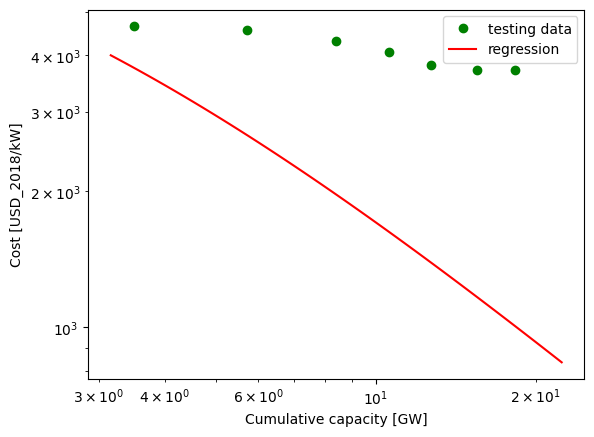

Testing : R^2 = 0.8748502366010384


In [16]:
reg = sigmoid(x=cap_test,a=a,b=b,c=c,d=d) # for R^2 computation
x_reg = np.logspace(0.5,1.35,50)
y_reg = sigmoid(x=x_reg,a=a,b=b,c=c,d=d) # for plotting

plt.plot(cap_test, cost_test,'go',label='testing data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(cost_test,reg)

r2 = r_value**2 
print("Testing : R^2 = " + str(r_value**2))

MSE_sigmoid.append(int(((reg-cost_test)**2).sum()/(N-int(N*train_test_ratio))))

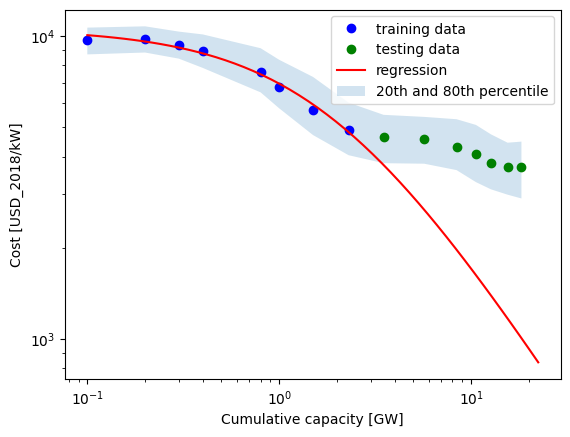

In [17]:
reg = sigmoid(x=cap_test,a=a,b=b,c=c,d=d) # for R^2 computation
x_reg = np.logspace(-1,1.35,50)
y_reg = sigmoid(x=x_reg,a=a,b=b,c=c,d=d) # for plotting

plt.plot(cap_train, cost_train,'bo',label='training data')
plt.plot(cap_test, cost_test,'go',label='testing data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.fill_between(cap,percentile_20,percentile_80,alpha=0.2,label='20th and 80th percentile')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

## Plateau

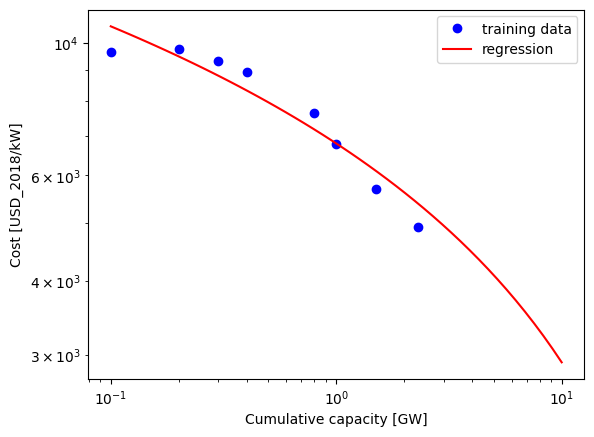

Training : R^2 = 0.9071866993666998


In [18]:
a = -2351730

b = -0.000713504

c = 2358520

reg = plateau(x=cap_train,a=a,b=b,c=c) # for R^2 computation
x_reg = np.logspace(-1,1,50)
y_reg = plateau(x=x_reg,a=a,b=b,c=c) # for plotting

plt.plot(cap_train, cost_train,'bo',label='training data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(cost_train,reg)

r2 = r_value**2 
print("Training : R^2 = " + str(r_value**2))

MSE_plateau.append(int(((reg-cost_train)**2).sum()/int(N*train_test_ratio)))

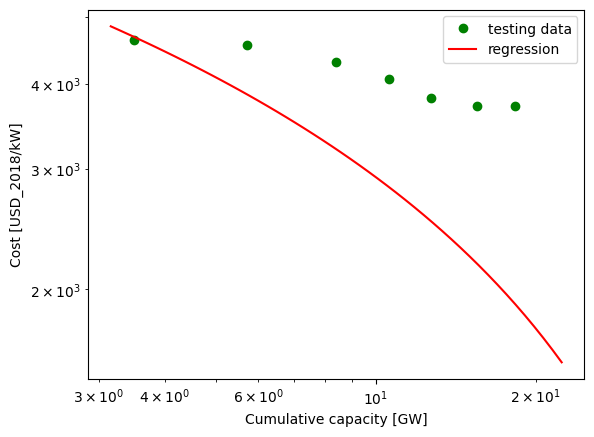

Testing : R^2 = 0.9344963844979585


In [19]:
reg = plateau(x=cap_test,a=a,b=b,c=c) # for R^2 computation
x_reg = np.logspace(0.5,1.35,50)
y_reg = plateau(x=x_reg,a=a,b=b,c=c) # for plotting

plt.plot(cap_test, cost_test,'go',label='testing data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(cost_test,reg)

r2 = r_value**2 
print("Testing : R^2 = " + str(r_value**2))

MSE_plateau.append(int(((reg-cost_test)**2).sum()/(N-int(N*train_test_ratio))))

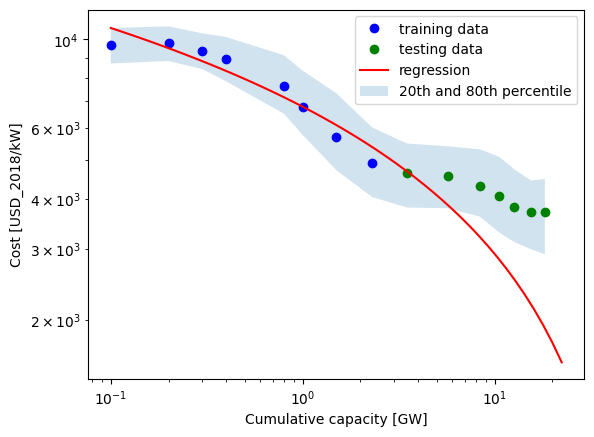

In [20]:
reg = plateau(x=cap_test,a=a,b=b,c=c) # for R^2 computation
x_reg = np.logspace(-1,1.35,50)
y_reg = plateau(x=x_reg,a=a,b=b,c=c) # for plotting

plt.plot(cap_train, cost_train,'bo',label='training data')
plt.plot(cap_test, cost_test,'go',label='testing data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.fill_between(cap,percentile_20,percentile_80,alpha=0.2,label='20th and 80th percentile')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

## S-curve

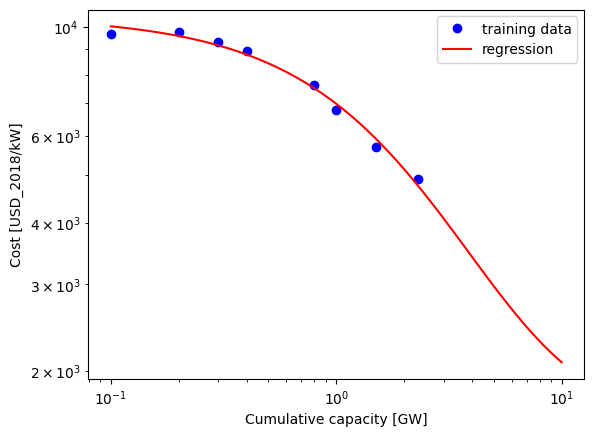

Training : R^2 = 0.9865172845985418


In [21]:
a = 4.42967

b = -2.47848

c = 357591

m = 0.00449128

reg = s_curve(x=cap_train,a=a,b=b,c=c,m=m) # for R^2 computation
x_reg = np.logspace(-1,1,50)
y_reg = s_curve(x=x_reg,a=a,b=b,c=c,m=m) # for plotting

plt.plot(cap_train, cost_train,'bo',label='training data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(cost_train,reg)

r2 = r_value**2 
print("Training : R^2 = " + str(r_value**2))

MSE_s_curve.append(int(((reg-cost_train)**2).sum()/int(N*train_test_ratio)))

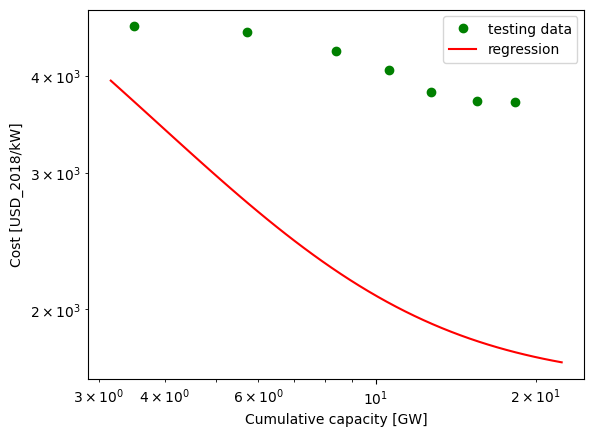

Testing : R^2 = 0.7923286468806503


In [22]:
reg = s_curve(x=cap_test,a=a,b=b,c=c,m=m) # for R^2 computation
x_reg = np.logspace(0.5,1.35,50)
y_reg = s_curve(x=x_reg,a=a,b=b,c=c,m=m) # for plotting

plt.plot(cap_test, cost_test,'go',label='testing data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(cost_test,reg)

r2 = r_value**2 
print("Testing : R^2 = " + str(r_value**2))

MSE_s_curve.append(int(((reg-cost_test)**2).sum()/(N-int(N*train_test_ratio))))

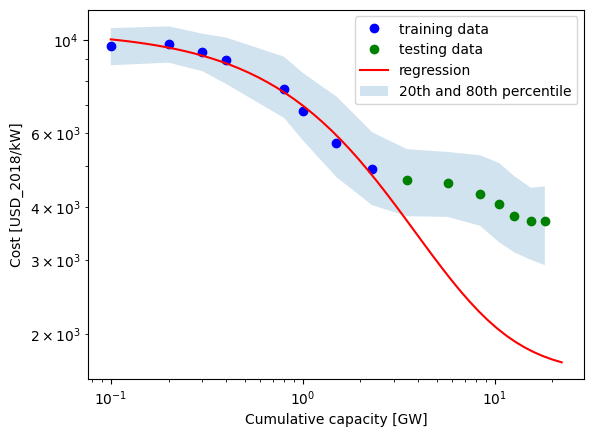

In [23]:
reg = s_curve(x=cap_test,a=a,b=b,c=c,m=m) # for R^2 computation
x_reg = np.logspace(-1,1.35,50)
y_reg = s_curve(x=x_reg,a=a,b=b,c=c,m=m) # for plotting

plt.plot(cap_train, cost_train,'bo',label='training data')
plt.plot(cap_test, cost_test,'go',label='testing data')
plt.plot(x_reg, y_reg,"r-", label='regression')
plt.fill_between(cap,percentile_20,percentile_80,alpha=0.2,label='20th and 80th percentile')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

In [24]:
# Results : training MSE // testing MSE
res = [MSE_wright,
MSE_boone,
MSE_sigmoid,
MSE_plateau,
MSE_s_curve]

res

[[466148, 110196],
 [466148, 110192],
 [46388, 5061236],
 [288012, 1503944],
 [41837, 3356514]]

# Global onshore wind 

In [25]:
# Data
train_test_ratio = 0.55
cost = np.array([2179,2039,2019,1921,1932,1826,1862,1888,1983,2016,1915,1905,1938,1796,1750,1614,1607,1599,1521,1448,1310])
cap = np.array([16.866,23.893,30.494,38.16,47.09,57.723,72.278,90.459,114.122,147.986,177.795,216.344,261.579,292.705,340.816,404.458,452.515,495.381,539.888,593.291,698.043])
N = len(cost)

# Training set (from 2000 to 2010)

cost_train = cost[0:int(N*train_test_ratio)]
cap_train = cap[0:int(N*train_test_ratio)]

# Testing set (from 2011 to 2020)

cost_test = cost[int(N*train_test_ratio):N]
cap_test = cap[int(N*train_test_ratio):N]

# Uncertainty on cost
percentile_05 = np.array([964,1153,1052,1383,1088,1150,1238,1069,1160,1254,1207,1217,1230,1181,1195,1171,1195,1149,1152,1088,1019])
percentile_95 = np.array([2457,3182,2380,2275,2575,2685,2668,2513,2731,2759,2704,2747,2857,2960,2949,2872,2544,2587,2343,2407,2209])

In [26]:
# Results 
MSE_wright_2 = []
MSE_boone_2 = []
MSE_sigmoid_2 = []
MSE_plateau_2 = []
MSE_s_curve_2 = []

## Wright

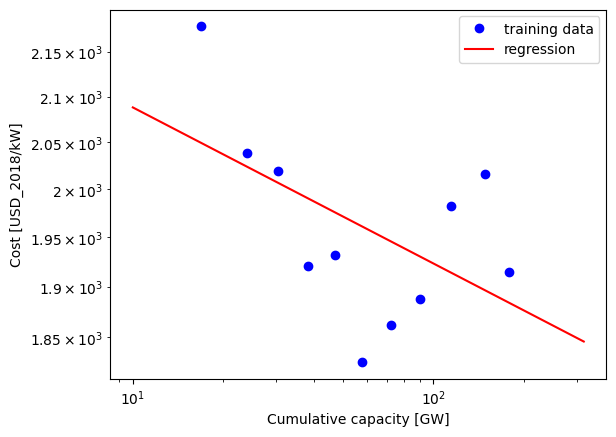

Training : R^2 = 0.2787598272461722


In [27]:
a = 7.72606

b = -0.0356536

reg = wright(x=cap_train,a=a,b=b) # for R^2 computation
x_reg = np.logspace(1,2.5,50)
y_reg = wright(x=x_reg,a=a,b=b) # for plotting

plt.plot(cap_train, cost_train,'bo',label='training data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(cost_train,reg)

r2 = r_value**2 
print("Training : R^2 = " + str(r_value**2))

MSE_wright_2.append(int(((reg-cost_train)**2).sum()/int(N*train_test_ratio)))

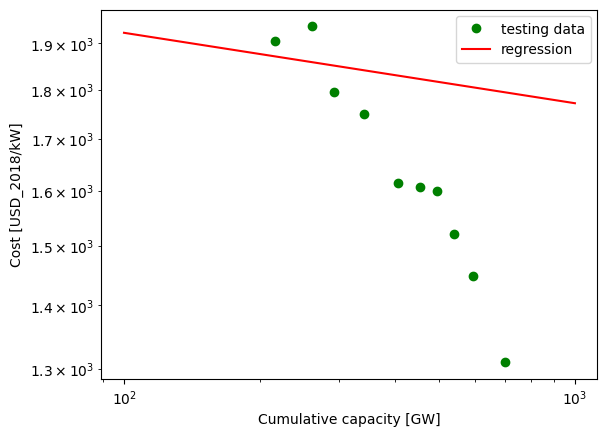

Testing : R^2 = 0.9502472875937005


In [28]:
reg = wright(x=cap_test,a=a,b=b) # for R^2 computation
x_reg = np.logspace(2,3,50)
y_reg = wright(x=x_reg,a=a,b=b) # for plotting

plt.plot(cap_test, cost_test,'go',label='testing data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(cost_test,reg)

r2 = r_value**2 
print("Testing : R^2 = " + str(r_value**2))

MSE_wright_2.append(int(((reg-cost_test)**2).sum()/(N-int(N*train_test_ratio))))

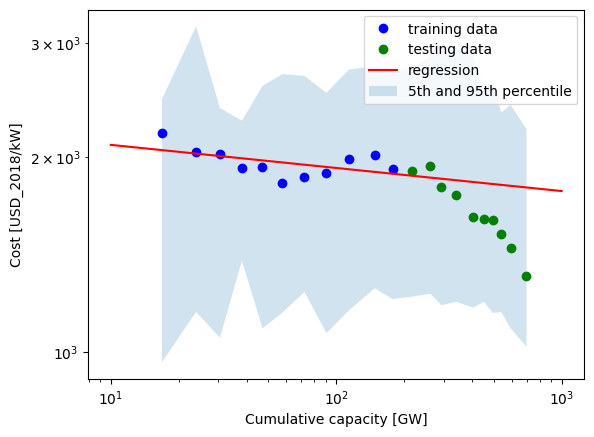

In [29]:
reg = wright(x=cap_test,a=a,b=b) # for R^2 computation
x_reg = np.logspace(1,3,50)
y_reg = wright(x=x_reg,a=a,b=b) # for plotting

plt.plot(cap_train, cost_train,'bo',label='training data')
plt.plot(cap_test, cost_test,'go',label='testing data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.fill_between(cap,percentile_05,percentile_95,alpha=0.2,label='5th and 95th percentile')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

## Boone

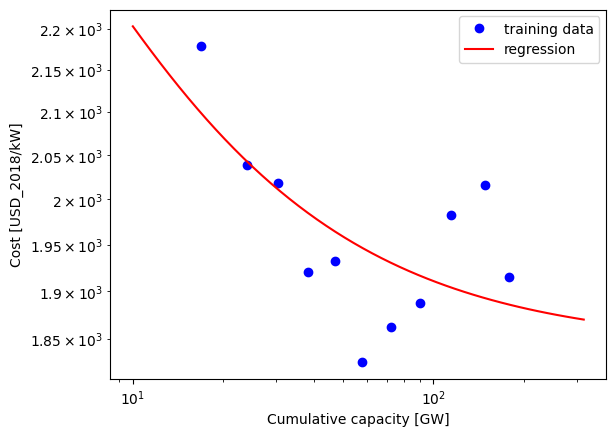

Training : R^2 = 0.45106363951597994


In [30]:
a = 1844.02

b = 773.138

c = 0.001

reg = boone(x=cap_train,a=a,b=b,c=c) # for R^2 computation
x_reg = np.logspace(1,2.5,50)
y_reg = boone(x=x_reg,a=a,b=b,c=c) # for plotting

plt.plot(cap_train, cost_train,'bo',label='training data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(cost_train,reg)

r2 = r_value**2 
print("Training : R^2 = " + str(r_value**2))

MSE_boone_2.append(int(((reg-cost_train)**2).sum()/int(N*train_test_ratio)))

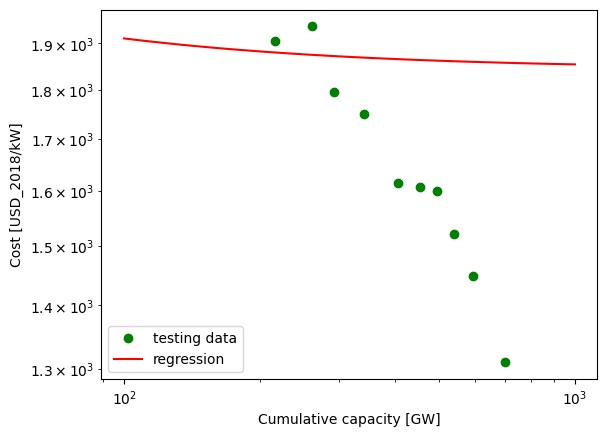

Testing : R^2 = 0.9055330060287086


In [31]:
reg = boone(x=cap_test,a=a,b=b,c=c) # for R^2 computation
x_reg = np.logspace(2,3,50)
y_reg = boone(x=x_reg,a=a,b=b,c=c) # for plotting

plt.plot(cap_test, cost_test,'go',label='testing data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(cost_test,reg)

r2 = r_value**2 
print("Testing : R^2 = " + str(r_value**2))

MSE_boone_2.append(int(((reg-cost_test)**2).sum()/(N-int(N*train_test_ratio))))

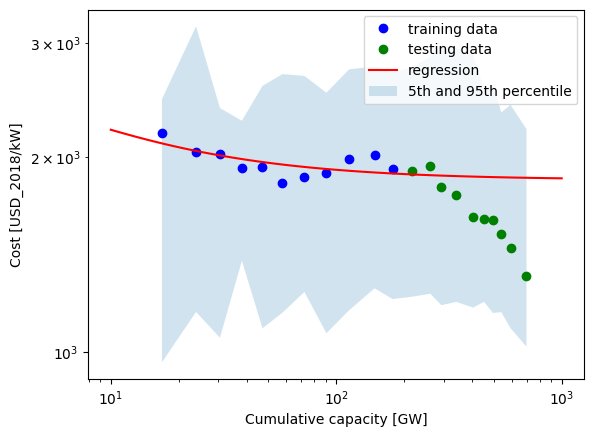

In [32]:
reg = boone(x=cap_test,a=a,b=b,c=c) # for R^2 computation
x_reg = np.logspace(1,3,50)
y_reg = boone(x=x_reg,a=a,b=b,c=c) # for plotting

plt.plot(cap_train, cost_train,'bo',label='training data')
plt.plot(cap_test, cost_test,'go',label='testing data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.fill_between(cap,percentile_05,percentile_95,alpha=0.2,label='5th and 95th percentile')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

## Sigmoid

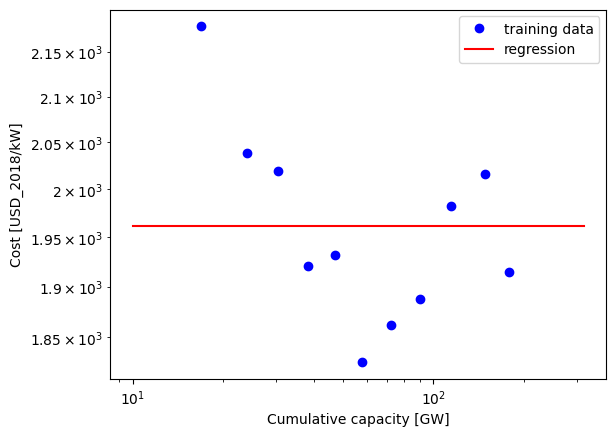

Training : R^2 = 0.1009303131124512


In [33]:
a = 1.02326

b = 0.000521854

c = 2.58051

d = 1.00106

reg = sigmoid(x=cap_train,a=a,b=b,c=c,d=d) # for R^2 computation
x_reg = np.logspace(1,2.5,50)
y_reg = sigmoid(x=x_reg,a=a,b=b,c=c,d=d) # for plotting

plt.plot(cap_train, cost_train,'bo',label='training data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(cost_train,reg)

r2 = r_value**2 
print("Training : R^2 = " + str(r_value**2))

MSE_sigmoid_2.append(int(((reg-cost_train)**2).sum()/int(N*train_test_ratio)))

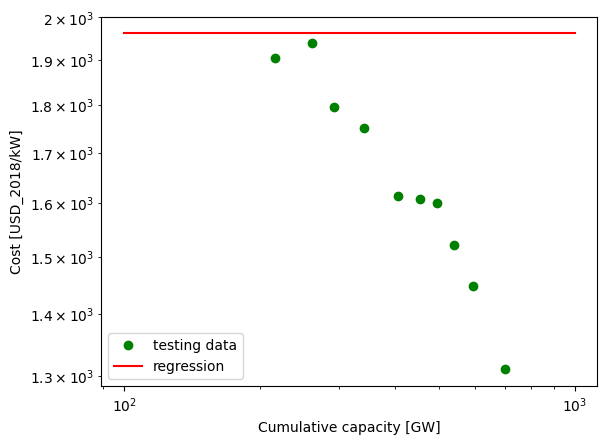

Testing : R^2 = 5.77540716843853e-32


In [34]:
reg = sigmoid(x=cap_test,a=a,b=b,c=c,d=d) # for R^2 computation
x_reg = np.logspace(2,3,50)
y_reg = sigmoid(x=x_reg,a=a,b=b,c=c,d=d) # for plotting

plt.plot(cap_test, cost_test,'go',label='testing data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(cost_test,reg)

r2 = r_value**2 
print("Testing : R^2 = " + str(r_value**2))

MSE_sigmoid_2.append(int(((reg-cost_test)**2).sum()/(N-int(N*train_test_ratio))))

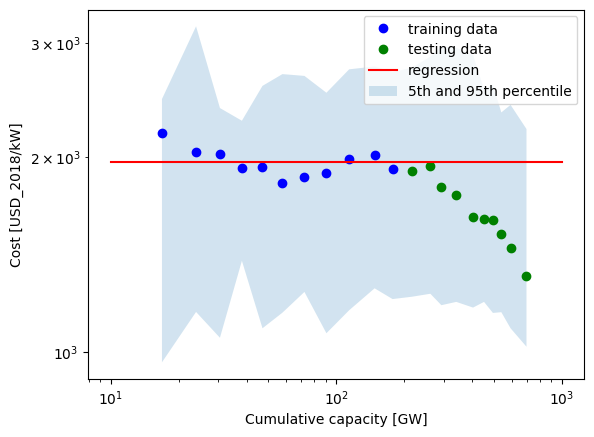

In [35]:
reg = sigmoid(x=cap_test,a=a,b=b,c=c,d=d) # for R^2 computation
x_reg = np.logspace(1,3,50)
y_reg = sigmoid(x=x_reg,a=a,b=b,c=c,d=d) # for plotting

plt.plot(cap_train, cost_train,'bo',label='training data')
plt.plot(cap_test, cost_test,'go',label='testing data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.fill_between(cap,percentile_05,percentile_95,alpha=0.2,label='5th and 95th percentile')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

## Plateau

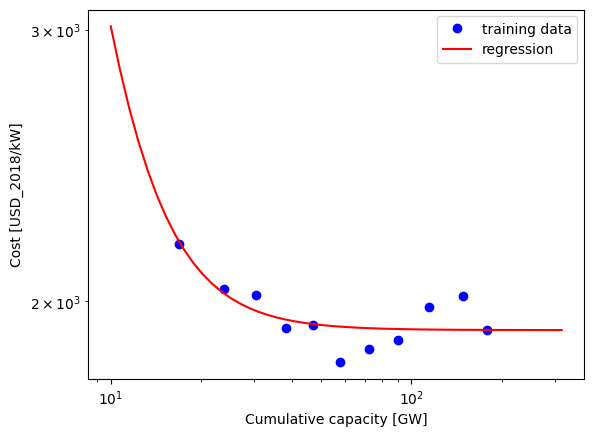

Training : R^2 = 0.67611589502206


In [36]:
a = 1916.1

b = -2.67945

c = 526447

reg = plateau(x=cap_train,a=a,b=b,c=c) # for R^2 computation
x_reg = np.logspace(1,2.5,50)
y_reg = plateau(x=x_reg,a=a,b=b,c=c) # for plotting

plt.plot(cap_train, cost_train,'bo',label='training data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(cost_train,reg)

r2 = r_value**2 
print("Training : R^2 = " + str(r_value**2))

MSE_plateau_2.append(int(((reg-cost_train)**2).sum()/int(N*train_test_ratio)))

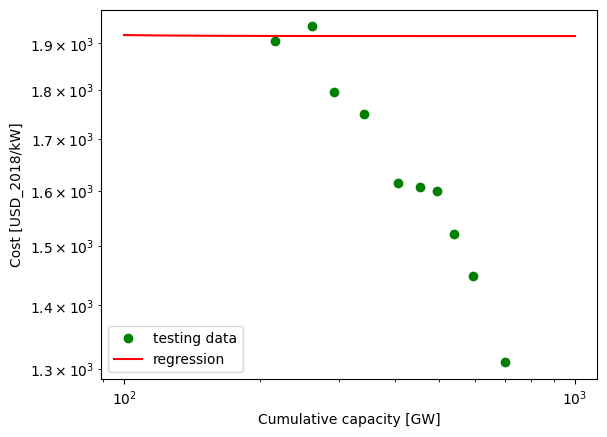

Testing : R^2 = 0.7276050171043851


In [37]:
reg = plateau(x=cap_test,a=a,b=b,c=c) # for R^2 computation
x_reg = np.logspace(2,3,50)
y_reg = plateau(x=x_reg,a=a,b=b,c=c) # for plotting

plt.plot(cap_test, cost_test,'go',label='testing data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(cost_test,reg)

r2 = r_value**2 
print("Testing : R^2 = " + str(r_value**2))

MSE_plateau_2.append(int(((reg-cost_test)**2).sum()/(N-int(N*train_test_ratio))))

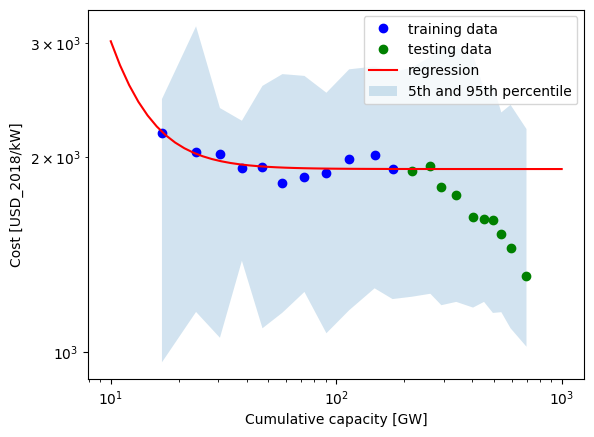

In [38]:
reg = plateau(x=cap_test,a=a,b=b,c=c) # for R^2 computation
x_reg = np.logspace(1,3,50)
y_reg = plateau(x=x_reg,a=a,b=b,c=c) # for plotting

plt.plot(cap_train, cost_train,'bo',label='training data')
plt.plot(cap_test, cost_test,'go',label='testing data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.fill_between(cap,percentile_05,percentile_95,alpha=0.2,label='5th and 95th percentile')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

## S-curve

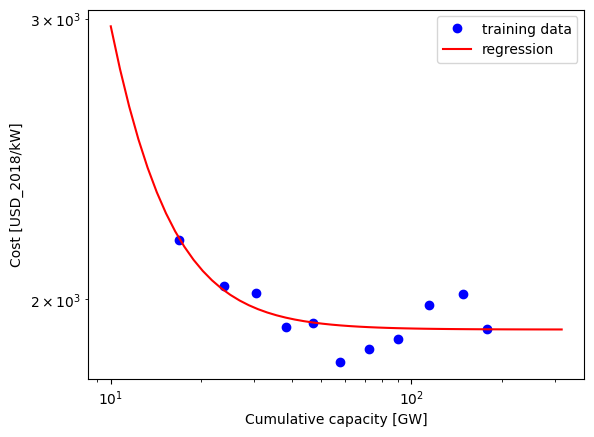

Training : R^2 = 0.675335343132505


In [39]:
a = -0.342507

b = -2.53016

c = 328854

m = 0.00582224

reg = s_curve(x=cap_train,a=a,b=b,c=c,m=m) # for R^2 computation
x_reg = np.logspace(1,2.5,50)
y_reg = s_curve(x=x_reg,a=a,b=b,c=c,m=m) # for plotting

plt.plot(cap_train, cost_train,'bo',label='training data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(cost_train,reg)

r2 = r_value**2 
print("Training : R^2 = " + str(r_value**2))

MSE_s_curve_2.append(int(((reg-cost_train)**2).sum()/int(N*train_test_ratio)))

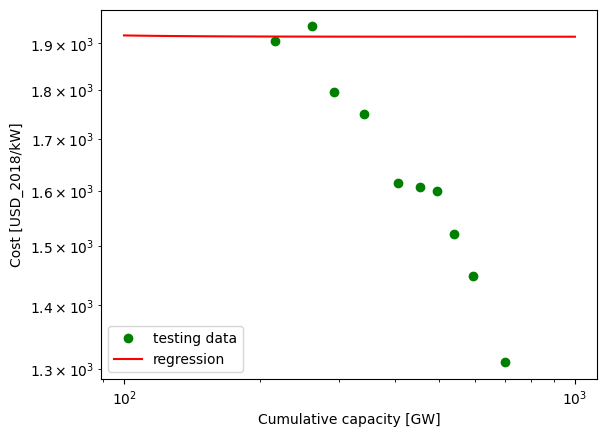

Testing : R^2 = 0.7426465696129149


In [40]:
reg = s_curve(x=cap_test,a=a,b=b,c=c,m=m) # for R^2 computation
x_reg = np.logspace(2,3,50)
y_reg = s_curve(x=x_reg,a=a,b=b,c=c,m=m) # for plotting

plt.plot(cap_test, cost_test,'go',label='testing data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(cost_test,reg)

r2 = r_value**2 
print("Testing : R^2 = " + str(r_value**2))

MSE_s_curve_2.append(int(((reg-cost_test)**2).sum()/(N-int(N*train_test_ratio))))

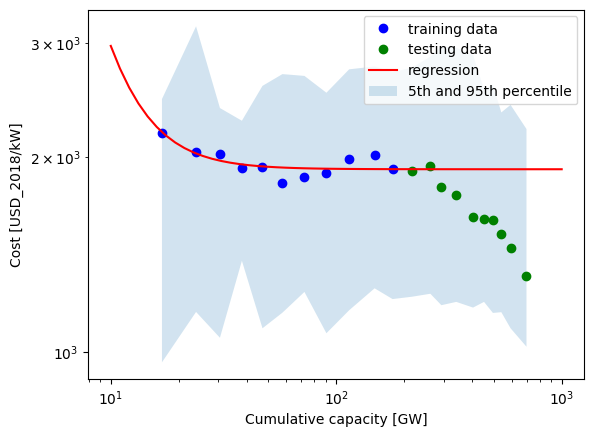

In [41]:
reg = s_curve(x=cap_test,a=a,b=b,c=c,m=m) # for R^2 computation
x_reg = np.logspace(1,3,50)
y_reg = s_curve(x=x_reg,a=a,b=b,c=c,m=m) # for plotting

plt.plot(cap_train, cost_train,'bo',label='training data')
plt.plot(cap_test, cost_test,'go',label='testing data')
plt.plot(x_reg, y_reg,'r-',label='regression')
plt.fill_between(cap,percentile_05,percentile_95,alpha=0.2,label='5th and 95th percentile')
plt.loglog()
plt.xlabel('Cumulative capacity [GW]')
plt.ylabel('Cost [USD_2018/kW]')
plt.legend()
plt.show()